In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# import ternary
from subprocess import Popen, PIPE, call
import sys
sys.path.append('../')
from package_global_functions import *

from mpltern.datasets import get_triangular_grid

# https://stackoverflow.com/questions/77345220/arrows-in-ternary-plot-using-quiver
# https://mpltern.readthedocs.io/en/latest/gallery/introductory/08.quiver.html

def nullpi2_sol1(pi1,q1,q2,l):
    r1, r2 = 1/q1, 1/q2
    f0 = r2/l
    f1= f0*pi1*(1-l)/(r1-r2)
    f2 = 1-f0*(1+pi1*(1-l)/(r1-r2))
    return f0,f1,f2

def nullpi2_sol2(pi1,q1,q2,l):
    r1, r2 = 1/q1, 1/q2
    B = pi1*(1-l)+r1-l
    f1 = (-B + np.sqrt(B**2 + 4*l*(1-l)*pi1))/(2*l)
    f0, f2 = 1 - f1, 0.0
    return f0,f1,f2

## (TERNARY) By default, f0 should be bottom, f1 right, f2 left:

/usr/local/lib/python3.11/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


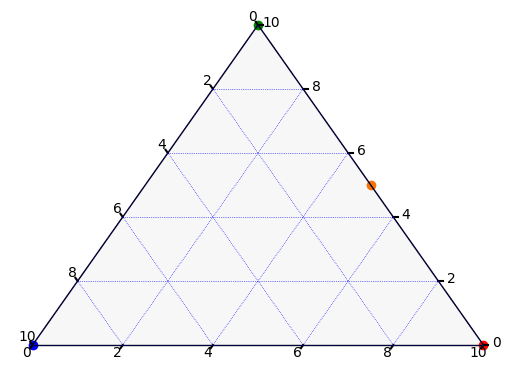

In [100]:
figure, tax = ternary.figure(scale=10) # clockwise means axes = bottom, left, right
# Set ticks
# permutation T->
# tax.ticks(clockwise=True, multiple=0.1, ticks=["%.1f" % (1.0 - 1.0 * i / 10.0) for i in range(11)], linewidth=1)
tax.ticks(multiple=2)

# Draw Boundary and Gridlines
tax.boundary(linewidth=1.0)
tax.gridlines(color="blue", multiple=2, linewidth=0.5)

# Set Axis labels and Title
fontsize = 15
# tax.set_title("Simplex Boundary and Gridlines", fontsize=fontsize)

# if permutation 012, default:
# tax.left_axis_label("$f_2$", fontsize=fontsize)
# tax.right_axis_label("$f_1$", fontsize=fontsize)
# tax.bottom_axis_label("$f_0$", fontsize=fontsize)

# if permutation 210
# tax.left_axis_label("$f_0$", fontsize=fontsize)
# tax.right_axis_label("$f_1$", fontsize=fontsize)
# tax.bottom_axis_label("$f_2$", fontsize=fontsize)



# Some solutions at the fully interdependent limit q1<q2
q1, q2, l = 7.0, 10.0, 0.6
fs1 = [(10, 0.0, 0.0)]
fs2 = [(0, 10, 0)]
fs3 = [(0,0,10)]
fs4 = [(5, 5, 0)]

tax.scatter(fs1, marker='o', color='r')
tax.scatter(fs2, marker='o', color='g')
tax.scatter(fs3, marker='o', color='b')
tax.scatter(fs4, marker='o', color='xkcd:orange')

# Remove default Matplotlib Axes
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

ternary.plt.show()

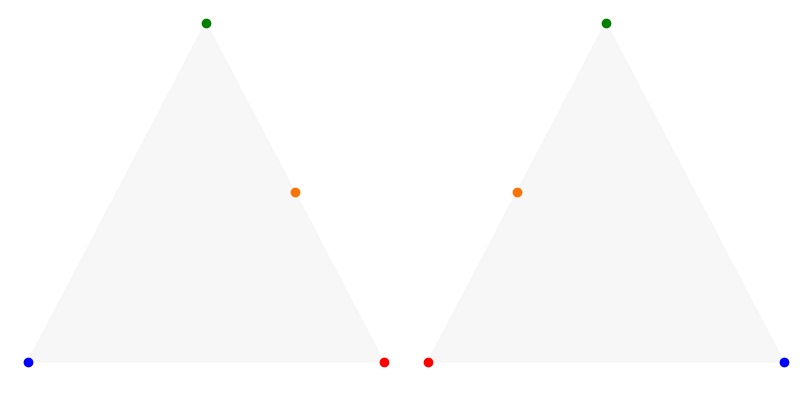

In [107]:
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
tax0 = ternary.TernaryAxesSubplot(ax=ax[0], scale=10, orientation)
tax1 = ternary.TernaryAxesSubplot(ax=ax[1], scale=10, permutation='210')

fs1 = [(10, 0.0, 0.0)]
fs2 = [(0, 10, 0)]
fs3 = [(0,0,10)]
fs4 = [(5, 5, 0)]

for tax in [tax0, tax1]:
    tax.scatter(fs1, marker='o', color='r')
    tax.scatter(fs2, marker='o', color='g')
    tax.scatter(fs3, marker='o', color='b')
    tax.scatter(fs4, marker='o', color='xkcd:orange')
    tax.get_axes().axis('off')
    tax.clear_matplotlib_ticks()

## MPLTERN

### fully interdependent limit

/tmp/ipykernel_73584/3444546261.py:50: RuntimeWarning: invalid value encountered in divide
  df0 = df0/norm
/tmp/ipykernel_73584/3444546261.py:51: RuntimeWarning: invalid value encountered in divide
  df1 = df1/norm
/tmp/ipykernel_73584/3444546261.py:52: RuntimeWarning: invalid value encountered in divide
  df2 = df2/norm


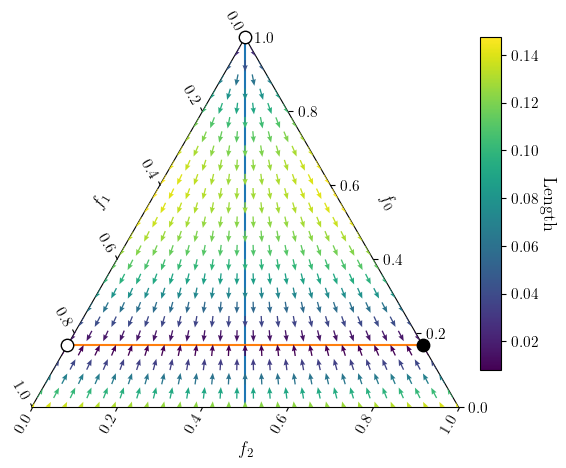

In [21]:
# ax = plt.subplot(projection='ternary')
fig = plt.figure()
ax = fig.add_subplot(projection='ternary')

ax.set_tlabel('$f_0$')
ax.set_llabel('$f_1$')
ax.set_rlabel('$f_2$')

ax.taxis.set_label_position('tick1')
ax.laxis.set_label_position('tick1')
ax.raxis.set_label_position('tick1')

# ax.scatter(1,0,0, marker='o', color='r', s=200)
# ax.scatter(0.33, 0.33, 0.33, marker='o', color='r', s=200)

# Some solutions at the fully interdependent limit q1<q2
pi1, pi2 = 0.0, 0.0
q1, q2, l = 10.0, 10.0, 0.6
fs1 = (1.0, 0.0, 0.0)
fs2 = (1/(l*q1), 1.0-1/(l*q1), 0.0)
fs3 = (1/(l*q2), 0.0, 1-1/(l*q2))

# ax.scatter(*fs1, marker='o', color='r', s=100, clip_on=False)
# ax.scatter(*fs2, marker='o', color='g', s=100, clip_on=False)
# ax.scatter(*fs3, marker='o', color='b', s=100, clip_on=False)

ax.scatter(*fs1, marker='o', color='w', edgecolor='k', s=80, clip_on=False, zorder=101)
ax.scatter(*fs2, marker='o', color='w', edgecolor='k', s=80, clip_on=False, zorder=100)
#stable
ax.scatter(*fs3, marker='o', color='k', s=80, clip_on=False, zorder=103)

# ax.plot([1.0, 0.33], [0.0, 0.33], [0.0, 0.33])
ax.plot([0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0], [0.5, 0.45, 0.4, 0.3, 0.2, 0.1, 0.0], [0.5, 0.45, 0.4, 0.3, 0.2, 0.1, 0.0])
if q1 == q2:
    ax.plot([1/(q1*l), 1/(q1*l)], [0.0, 1-(1/(q1*l))], [1-(1/(q1*l)), 0.0])

# t, l , r = get_triangular_grid()
# f0, f1 , f2 = get_triangular_grid(21)
f0, f1 , f2 = get_triangular_grid(27)

df1 = f0*((1-l)*pi1 + l*f1) - f1/q1
df2 = f0*((1-l)*pi2 + l*f2) - f2/q2
# f0...
df0 = -df1-df2

# pc = ax.quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid', headwidth=4, zorder=99)

# all lengths equal and color code them:
norm = np.sqrt(df0**2+df1**2+df2**2)
df0 = df0/norm
df1 = df1/norm
df2 = df2/norm
pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, scale=30, pivot='mid', headwidth=4, zorder=99)

cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label('Length', rotation=270, va='baseline')


### general solution

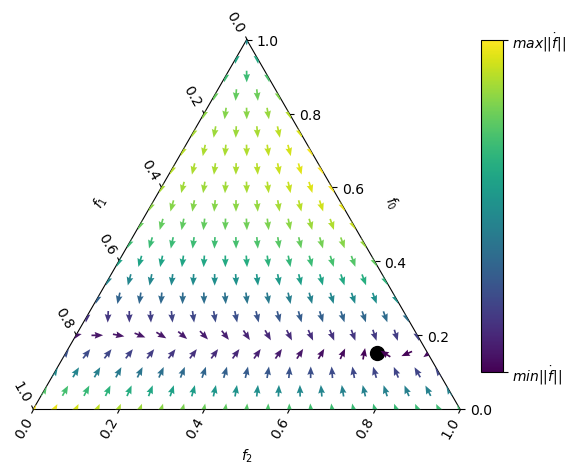

In [7]:
# ax = plt.subplot(projection='ternary')

fig = plt.figure()
ax = fig.add_subplot(projection='ternary')

ax.set_tlabel('$f_0$')
ax.set_llabel('$f_1$')
ax.set_rlabel('$f_2$')

ax.taxis.set_label_position('tick1')
ax.laxis.set_label_position('tick1')
ax.raxis.set_label_position('tick1')

# ax.scatter(1,0,0, marker='o', color='r', s=200)
# ax.scatter(0.33, 0.33, 0.33, marker='o', color='r', s=200)

# Some solution
pi1, pi2 = 0.1, 0.1
q1, q2, l = 7.0, 10.0, 0.6
callstr = f'python f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l}'
p = Popen(callstr, shell=True, stdin=PIPE, stdout=PIPE, stderr=PIPE)
output, err = p.communicate()
fs = [float(o) for o in output.split(b' ')]

ax.scatter(*fs, marker='o', color='k', s=100)

# t, l , r = get_triangular_grid()
# f0, f1 , f2 = get_triangular_grid()
f0, f1 , f2 = get_triangular_grid(21)

df1 = f0*((1-l)*pi1 + l*f1) - f1/q1
df2 = f0*((1-l)*pi2 + l*f2) - f2/q2
# f0...
df0 = -df1-df2

# all lengths equal and color code them:
norm = np.sqrt(df0**2+df1**2+df2**2)
df0 = df0/norm
df1 = df1/norm
df2 = df2/norm
pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, scale=30, pivot='mid', headwidth=4, zorder=99)

cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
minNorm, maxNorm = np.min(norm), np.max(norm)
colorbar = fig.colorbar(pc, cax=cax, orientation='vertical', ticks=[minNorm, maxNorm])
colorbar.ax.set_yticklabels(['$min|| \dot{f} ||$', '$max|| \dot{f} ||$'])
fig.savefig('ternary_plot_gensol.png')

### null pi2 limit

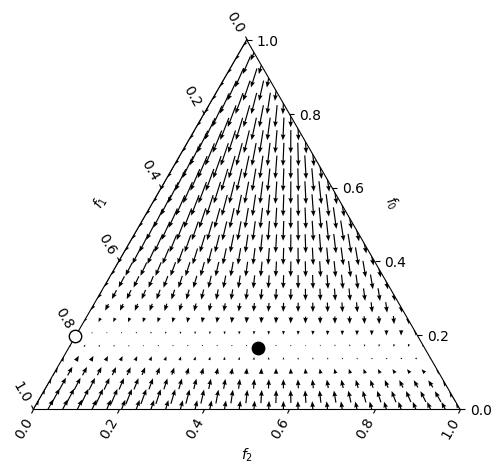

In [230]:
ax = plt.subplot(projection='ternary')

ax.set_tlabel('$f_0$')
ax.set_llabel('$f_1$')
ax.set_rlabel('$f_2$')

ax.taxis.set_label_position('tick1')
ax.laxis.set_label_position('tick1')
ax.raxis.set_label_position('tick1')

# ax.scatter(1,0,0, marker='o', color='r', s=200)
# ax.scatter(0.33, 0.33, 0.33, marker='o', color='r', s=200)

# Some solutions at the null pi2 limit q1<q2, l over lcs
pi1, pi2 = 0.25, 0.0
q1, q2, l = 7.0, 10.0, 0.6
fs1 = nullpi2_sol1(pi1, q1, q2, l)
fs2 = nullpi2_sol2(pi1, q1, q2, l)

ax.scatter(*fs1, marker='o', color='k', edgecolor='k', s=80, clip_on=False, zorder=101)
ax.scatter(*fs2, marker='o', color='w', edgecolor='k', s=80, clip_on=False, zorder=100)

# t, l , r = get_triangular_grid()
# f0, f1 , f2 = get_triangular_grid(21)
f0, f1 , f2 = get_triangular_grid(30)

df1 = f0*((1-l)*pi1 + l*f1) - f1/q1
df2 = f0*((1-l)*pi2 + l*f2) - f2/q2
# f0...
df0 = -df1-df2

pc = ax.quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid', headwidth=4, zorder=99)

In [178]:
df0[df0 != df0]

array([], dtype=float64)

# The definitive figure:

In [9]:
def set_labels(axi):
    axi.set_tlabel('$f_0$')
    axi.set_llabel('$f_1$')
    axi.set_rlabel('$f_2$')
    axi.taxis.set_label_position('tick1')
    axi.laxis.set_label_position('tick1')
    axi.raxis.set_label_position('tick1')

def get_dfs(pi1,pi2,q1,q2,l):
    df1 = f0*((1-l)*pi1 + l*f1) - f1/q1
    df2 = f0*((1-l)*pi2 + l*f2) - f2/q2
    df0 = -df1-df2
    return df0, df1, df2

# idea on how to make the separator lines:
# https://stackoverflow.com/questions/26084231/draw-a-separator-or-lines-between-subplots

/tmp/ipykernel_73584/2177960804.py:108: RuntimeWarning: invalid value encountered in divide
  df0, df1, df2 = df0/norm, df1/norm, df2/norm
/tmp/ipykernel_73584/2177960804.py:122: RuntimeWarning: invalid value encountered in divide
  df0, df1, df2 = df0/norm, df1/norm, df2/norm
/tmp/ipykernel_73584/2177960804.py:146: RuntimeWarning: invalid value encountered in divide
  df0, df1, df2 = df0/norm, df1/norm, df2/norm
/tmp/ipykernel_73584/2177960804.py:161: RuntimeWarning: invalid value encountered in divide
  df0, df1, df2 = df0/norm, df1/norm, df2/norm


0.0 0.3358757210636101


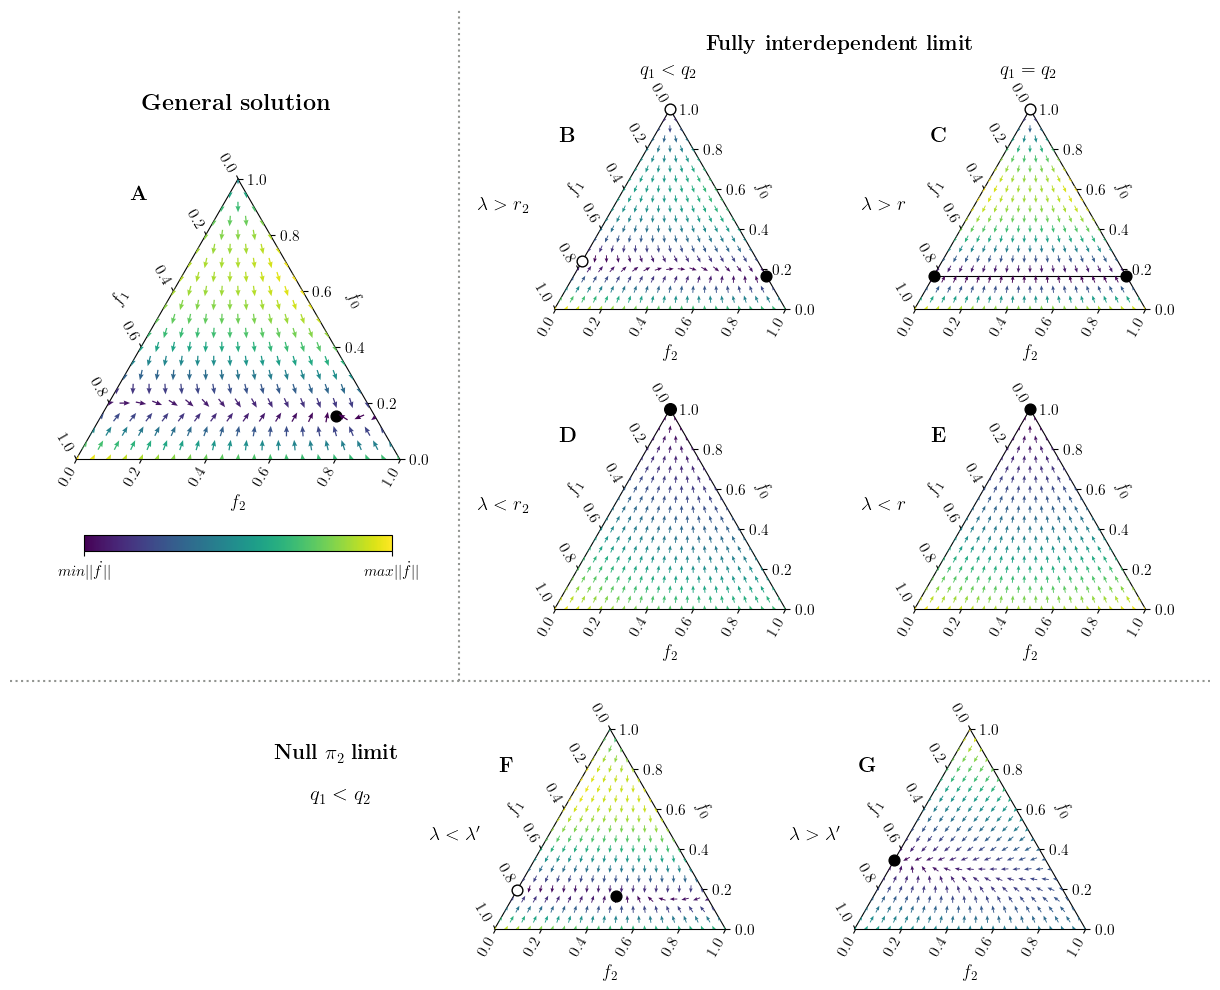

In [27]:
fig = plt.figure(figsize=(12, 10))
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

# ax = fig.add_subplot(331)
# ax.axis('off')
# ax = fig.add_subplot(332, projection='ternary')
# ax = fig.add_subplot(333, projection='ternary')
# ax = fig.add_subplot(335, projection='ternary')
# ax = fig.add_subplot(336, projection='ternary')
# ax = fig.add_subplot(338, projection='ternary')
# ax = fig.add_subplot(339, projection='ternary')

axG = fig.add_axes([0.05, 0.55, 0.28, 0.28], projection='ternary')
ax1 = fig.add_axes([0.45, 0.7, 0.2, 0.2], projection='ternary')
ax2 = fig.add_axes([0.75, 0.7, 0.2, 0.2], projection='ternary')
ax3 = fig.add_axes([0.45, 0.4, 0.2, 0.2], projection='ternary')
ax4 = fig.add_axes([0.75, 0.4, 0.2, 0.2], projection='ternary')
ax5 = fig.add_axes([0.4, 0.08, 0.2, 0.2], projection='ternary')
ax6 = fig.add_axes([0.7, 0.08, 0.2, 0.2], projection='ternary')
for ax in [axG, ax1, ax2, ax3, ax4, ax5, ax6]:
    set_labels(ax)

fig.text(0.11, 0.90, r'$\textbf{General solution}$', fontsize=17)
fig.text(0.58, 0.96, r'$\textbf{Fully interdependent limit}$', fontsize=15)
paramLabels_fs = 14
fig.text(0.525, 0.935, '$q_1 < q_2$', fontsize=paramLabels_fs)
fig.text(0.825, 0.935, '$q_1 = q_2$', fontsize=paramLabels_fs)
fig.text(0.39, 0.8, '$\lambda > r_2$', fontsize=paramLabels_fs)
fig.text(0.39, 0.5, '$\lambda < r_2$', fontsize=paramLabels_fs)
fig.text(0.71, 0.8, '$\lambda > r$', fontsize=paramLabels_fs)
fig.text(0.71, 0.5, '$\lambda < r$', fontsize=paramLabels_fs)
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
bbox_ax3, bbox_ax5 = get_bbox(ax3), get_bbox(ax5)
ySepLine = (bbox_ax3.y0 + bbox_ax5.y1)/2
SepLine = plt.Line2D([0,1], [ySepLine, ySepLine], transform=fig.transFigure, ls=':', color='xkcd:gray')
fig.add_artist(SepLine)
fig.text(0.22, 0.25, r'$\textbf{Null}$ $\pi_2$ $\textbf{limit}$', fontsize=15)
fig.text(0.25, 0.21, '$q_1 < q_2$', fontsize=15)
fig.text(0.35, 0.17, "$\lambda < \lambda'$", fontsize=paramLabels_fs)
fig.text(0.65, 0.17, "$\lambda > \lambda'$", fontsize=paramLabels_fs)
bbox_axG = get_bbox(axG)
xSepLine2 = bbox_axG.x1+0.025
SepLine2 = plt.Line2D([xSepLine2,xSepLine2], [ySepLine, 1], transform=fig.transFigure, ls=':', color='xkcd:gray')
fig.add_artist(SepLine2)

fig.text(0.1,0.81, r'$\textbf{A}$', color='xkcd:black')
fig.text(0.4575,0.8675, r'$\textbf{B}$', color='xkcd:black')
fig.text(0.7675,0.8675, r'$\textbf{C}$', color='xkcd:black')
fig.text(0.4575,0.5675, r'$\textbf{D}$', color='xkcd:black')
fig.text(0.7675,0.5675, r'$\textbf{E}$', color='xkcd:black')
fig.text(0.4075,0.17+0.0675, r'$\textbf{F}$', color='xkcd:black')
fig.text(0.7075,0.17+0.0675, r'$\textbf{G}$', color='xkcd:black')

fixPoints_ms, quiver_scale = 60, 25
# minNorm, maxNorm = 0.0, 0.0
# already knowing min,maxNorm across all plots allows me to unify colormaps:
minNorm_def, maxNorm_def = 0.0, 0.3358757210636101
# or make each colormap on its own:
autocmap = True
# GENERAL SOLUTION:
pi1, pi2 = 0.1, 0.1
q1, q2, l = 7.0, 10.0, 0.6
callstr = f'python f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l}'
p = Popen(callstr, shell=True, stdin=PIPE, stdout=PIPE, stderr=PIPE)
output, err = p.communicate()
fs = [float(o) for o in output.split(b' ')]
axG.scatter(*fs, marker='o', color='k', s=fixPoints_ms)
f0, f1 , f2 = get_triangular_grid(21)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
norm = np.sqrt(df0**2+df1**2+df2**2)
df0, df1, df2 = df0/norm, df1/norm, df2/norm
minNorm, maxNorm = np.min(norm), np.max(norm)
if autocmap:
    pc = axG.quiver(f0, f1, f2, df0, df1, df2, norm, scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
else:
    pc = axG.quiver(f0, f1, f2, df0, df1, df2, norm, clim=(minNorm_def, maxNorm_def), scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)

# add the colorbar into the axis:
# colorbar = fig.colorbar(pc, ax=axG, orientation='horizontal', location='bottom', pad=0.2, fraction=0.05, aspect=35, shrink=0.83)
# make a new axis for the colorbar:
cax = axG.inset_axes([0.025, -0.33, 0.95, 0.06], transform=axG.transAxes)
if autocmap:
    colorbar = fig.colorbar(pc, cax=cax, orientation='horizontal', ticks=[minNorm, maxNorm])
    colorbar.ax.set_xticklabels(['$min|| \dot{f} ||$', '$max|| \dot{f} ||$'])
else:
    colorbar = fig.colorbar(pc, cax=cax, orientation='horizontal')
    colorbar.set_label('$|| \dot{f} ||$', labelpad=13.0, va='baseline')


# FULLY INTERDEPENDENT LIMIT, different qualities:
ax = ax1
pi1, pi2 = 0.0, 0.0
q1, q2, l = 7.0, 10.0, 0.6
fs1 = (1.0, 0.0, 0.0)
fs2 = (1/(l*q1), 1.0-1/(l*q1), 0.0)
fs3 = (1/(l*q2), 0.0, 1-1/(l*q2))
ax.scatter(*fs1, marker='o', color='w', edgecolor='k', s=fixPoints_ms, clip_on=False, zorder=101)
ax.scatter(*fs2, marker='o', color='w', edgecolor='k', s=fixPoints_ms, clip_on=False, zorder=100)
#stable
ax.scatter(*fs3, marker='o', color='k', s=fixPoints_ms, clip_on=False, zorder=103)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
norm = np.sqrt(df0**2+df1**2+df2**2)
if np.min(norm) < minNorm:
    minNorm = np.min(norm)
if np.max(norm) > maxNorm:
    maxNorm = np.max(norm)
df0, df1, df2 = df0/norm, df1/norm, df2/norm
if autocmap:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
else:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, clim=(minNorm_def, maxNorm_def), scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
# ... and lambda below r2
ax = ax3
l = 0.05
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
norm = np.sqrt(df0**2+df1**2+df2**2)
if np.min(norm) < minNorm:
    minNorm = np.min(norm)
if np.max(norm) > maxNorm:
    maxNorm = np.max(norm)
df0, df1, df2 = df0/norm, df1/norm, df2/norm
ax.scatter(*fs1, marker='o', color='k', edgecolor='k', s=70, clip_on=False, zorder=101)
if autocmap:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
else:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, clim=(minNorm_def, maxNorm_def), scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)

# equal qualities and lambda above r
ax = ax2
q1, q2, l = 10.0, 10.0, 0.6
fs1 = (1.0, 0.0, 0.0)
fs2 = (1/(l*q1), 1.0-1/(l*q1), 0.0)
fs3 = (1/(l*q2), 0.0, 1-1/(l*q2))
ax.scatter(*fs1, marker='o', color='w', edgecolor='k', s=fixPoints_ms, clip_on=False, zorder=101)
ax.scatter(*fs2, marker='o', color='k', edgecolor='k', s=fixPoints_ms, clip_on=False, zorder=100)
ax.scatter(*fs3, marker='o', color='k', s=fixPoints_ms, clip_on=False, zorder=103)
if q1 == q2:
    ax.plot([1/(q1*l), 1/(q1*l)], [0.0, 1-(1/(q1*l))], [1-(1/(q1*l)), 0.0], lw=0.8, color='k')
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
norm = np.sqrt(df0**2+df1**2+df2**2)
if np.min(norm) < minNorm:
    minNorm = np.min(norm)
if np.max(norm) > maxNorm:
    maxNorm = np.max(norm)
df0, df1, df2 = df0/norm, df1/norm, df2/norm
if autocmap:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
else:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, clim=(minNorm_def, maxNorm_def), scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
# ... and lambda below r
ax = ax4
l = 0.05
ax.scatter(*fs1, marker='o', color='k', edgecolor='k', s=fixPoints_ms, clip_on=False, zorder=101)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
norm = np.sqrt(df0**2+df1**2+df2**2)
if np.min(norm) < minNorm:
    minNorm = np.min(norm)
if np.max(norm) > maxNorm:
    maxNorm = np.max(norm)
df0, df1, df2 = df0/norm, df1/norm, df2/norm
if autocmap:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
else:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, clim=(minNorm_def, maxNorm_def), scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)


# asymmetric pi with null pi2 and q1<q2
# lambda above r2
ax = ax5
pi1, pi2 = 0.25, 0.0
q1, q2, l = 7.0, 10.0, 0.6
fs1 = nullpi2_sol1(pi1, q1, q2, l)
fs2 = nullpi2_sol2(pi1, q1, q2, l)
ax.scatter(*fs1, marker='o', color='k', edgecolor='k', s=fixPoints_ms, clip_on=False, zorder=101)
ax.scatter(*fs2, marker='o', color='w', edgecolor='k', s=fixPoints_ms, clip_on=False, zorder=100)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
norm = np.sqrt(df0**2+df1**2+df2**2)
if np.min(norm) < minNorm:
    minNorm = np.min(norm)
if np.max(norm) > maxNorm:
    maxNorm = np.max(norm)
df0, df1, df2 = df0/norm, df1/norm, df2/norm
if autocmap:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
else:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, clim=(minNorm_def, maxNorm_def), scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
# lambda below r2
ax = ax6
l = 0.05
fs2 = nullpi2_sol2(pi1, q1, q2, l)
ax6.scatter(*fs2, marker='o', color='k', edgecolor='k', s=fixPoints_ms, clip_on=False, zorder=101)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
norm = np.sqrt(df0**2+df1**2+df2**2)
if np.min(norm) < minNorm:
    minNorm = np.min(norm)
if np.max(norm) > maxNorm:
    maxNorm = np.max(norm)
df0, df1, df2 = df0/norm, df1/norm, df2/norm
if autocmap:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)
else:
    pc = ax.quiver(f0, f1, f2, df0, df1, df2, norm, clim=(minNorm_def, maxNorm_def), scale=quiver_scale, pivot='mid', headwidth=4, zorder=99)


print(minNorm, maxNorm)

fig.savefig('ternary_plots2.pdf')



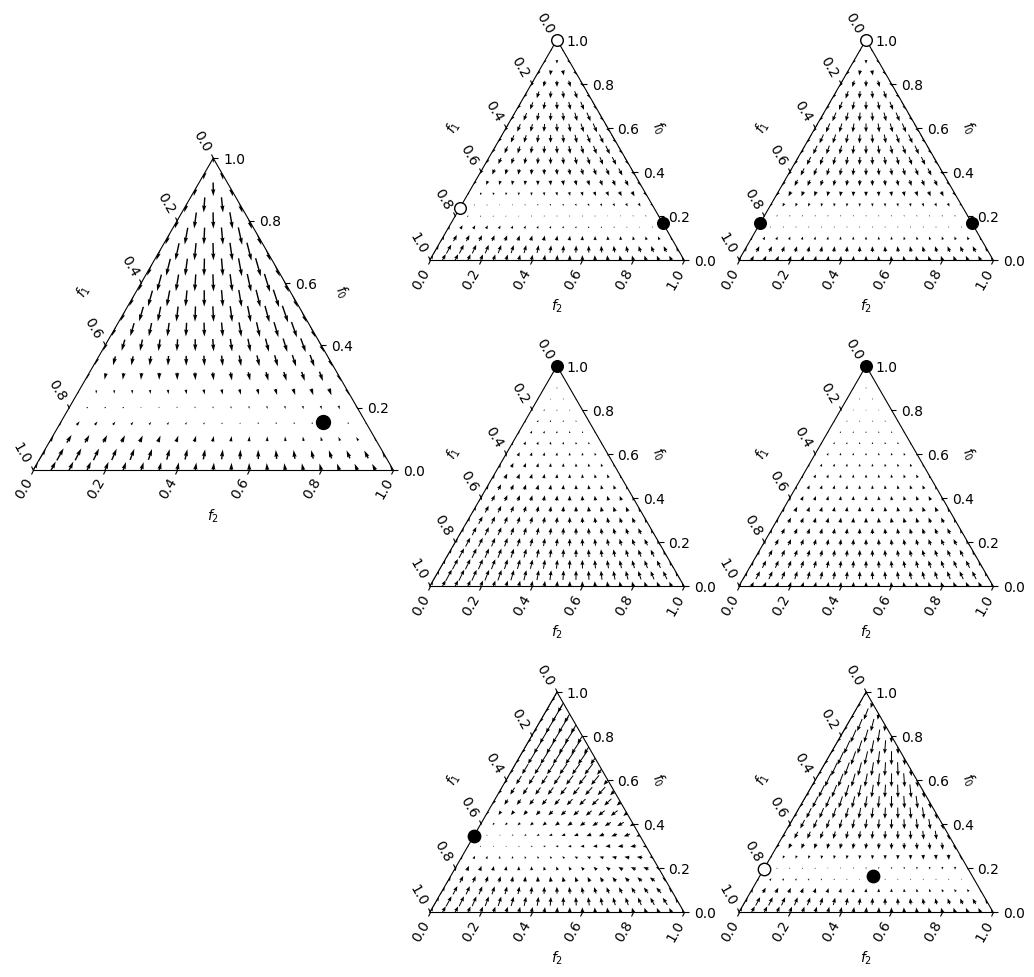

In [233]:
fig, ax = plt.subplots(3,3, figsize=(12, 12), width_ratios=[0.38, 0.31, 0.31], subplot_kw={'projection':'ternary'})



ax[0,0].axis('off')
ax[1,0].axis('off')
ax[2,0].axis('off')

# https://stackoverflow.com/questions/33942233/how-do-i-change-matplotlibs-subplot-projection-of-an-existing-axis
axG = fig.add_axes([0.1, 0.48, 0.3, 0.3], projection='ternary')
set_labels(axG)

for i in range(3):
    for j in range(1,3):
        set_labels(ax[i,j])


# GENERAL SOLUTION:
pi1, pi2 = 0.1, 0.1
q1, q2, l = 7.0, 10.0, 0.6
callstr = f'python f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l}'
p = Popen(callstr, shell=True, stdin=PIPE, stdout=PIPE, stderr=PIPE)
output, err = p.communicate()
fs = [float(o) for o in output.split(b' ')]
axG.scatter(*fs, marker='o', color='k', s=100)
f0, f1 , f2 = get_triangular_grid(21)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
pc = axG.quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid')

# FULLY INTERDEPENDENT LIMIT, different qualities:
pi1, pi2 = 0.0, 0.0
q1, q2, l = 7.0, 10.0, 0.6
fs1 = (1.0, 0.0, 0.0)
fs2 = (1/(l*q1), 1.0-1/(l*q1), 0.0)
fs3 = (1/(l*q2), 0.0, 1-1/(l*q2))
ax[0,1].scatter(*fs1, marker='o', color='w', edgecolor='k', s=70, clip_on=False, zorder=101)
ax[0,1].scatter(*fs2, marker='o', color='w', edgecolor='k', s=70, clip_on=False, zorder=100)
#stable
ax[0,1].scatter(*fs3, marker='o', color='k', s=70, clip_on=False, zorder=103)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
pc = ax[0,1].quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid', headwidth=4, zorder=99)
# ... and lambda below r2
l = 0.05
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
ax[1,1].scatter(*fs1, marker='o', color='k', edgecolor='k', s=70, clip_on=False, zorder=101)
pc = ax[1,1].quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid', headwidth=4, zorder=99)

# equal qualities and lambda above r
q1, q2, l = 10.0, 10.0, 0.6
fs1 = (1.0, 0.0, 0.0)
fs2 = (1/(l*q1), 1.0-1/(l*q1), 0.0)
fs3 = (1/(l*q2), 0.0, 1-1/(l*q2))
ax[0,2].scatter(*fs1, marker='o', color='w', edgecolor='k', s=70, clip_on=False, zorder=101)
ax[0,2].scatter(*fs2, marker='o', color='k', edgecolor='k', s=70, clip_on=False, zorder=100)
ax[0,2].scatter(*fs3, marker='o', color='k', s=70, clip_on=False, zorder=103)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
pc = ax[0,2].quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid', headwidth=4, zorder=99)
# ... and lambda below r
l = 0.05
ax[1,2].scatter(*fs1, marker='o', color='k', edgecolor='k', s=70, clip_on=False, zorder=101)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
pc = ax[1,2].quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid', headwidth=4, zorder=99)


# asymmetric pi with null pi2 and q1<q2
# lambda above r2
pi1, pi2 = 0.25, 0.0
q1, q2, l = 7.0, 10.0, 0.6
fs1 = nullpi2_sol1(pi1, q1, q2, l)
fs2 = nullpi2_sol2(pi1, q1, q2, l)
ax[2,2].scatter(*fs1, marker='o', color='k', edgecolor='k', s=80, clip_on=False, zorder=101)
ax[2,2].scatter(*fs2, marker='o', color='w', edgecolor='k', s=80, clip_on=False, zorder=100)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
pc = ax[2,2].quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid', headwidth=4, zorder=99)
# lambda below r2
l = 0.05
fs2 = nullpi2_sol2(pi1, q1, q2, l)
ax[2,1].scatter(*fs2, marker='o', color='k', edgecolor='k', s=80, clip_on=False, zorder=101)
df0, df1, df2 = get_dfs(pi1, pi2, q1, q2, l)
pc = ax[2,1].quiver(f0, f1, f2, df0, df1, df2, scale=3.0, pivot='mid', headwidth=4, zorder=99)

fig.savefig('ternary_plots.pdf')